With this program we will attempt to find a solution to a TSP.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

#matplotlib inline

plot_size   = 15
plot_width  = 16
plot_height = 8

params = {'legend.fontsize': 'large',
          'figure.figsize': (plot_width,plot_height),
          'axes.labelsize': plot_size,
          'axes.titlesize': plot_size,
          'xtick.labelsize': plot_size*0.75,
          'ytick.labelsize': plot_size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)

In [2]:
num_cities = 22

We generate a random coordinates for the cities

In [3]:
center_box = (100, 200) 

cities_coord,_ = make_blobs(n_samples=num_cities, 
                           centers=2, 
                           cluster_std=10, 
                           center_box=center_box, 
                           random_state = 2)



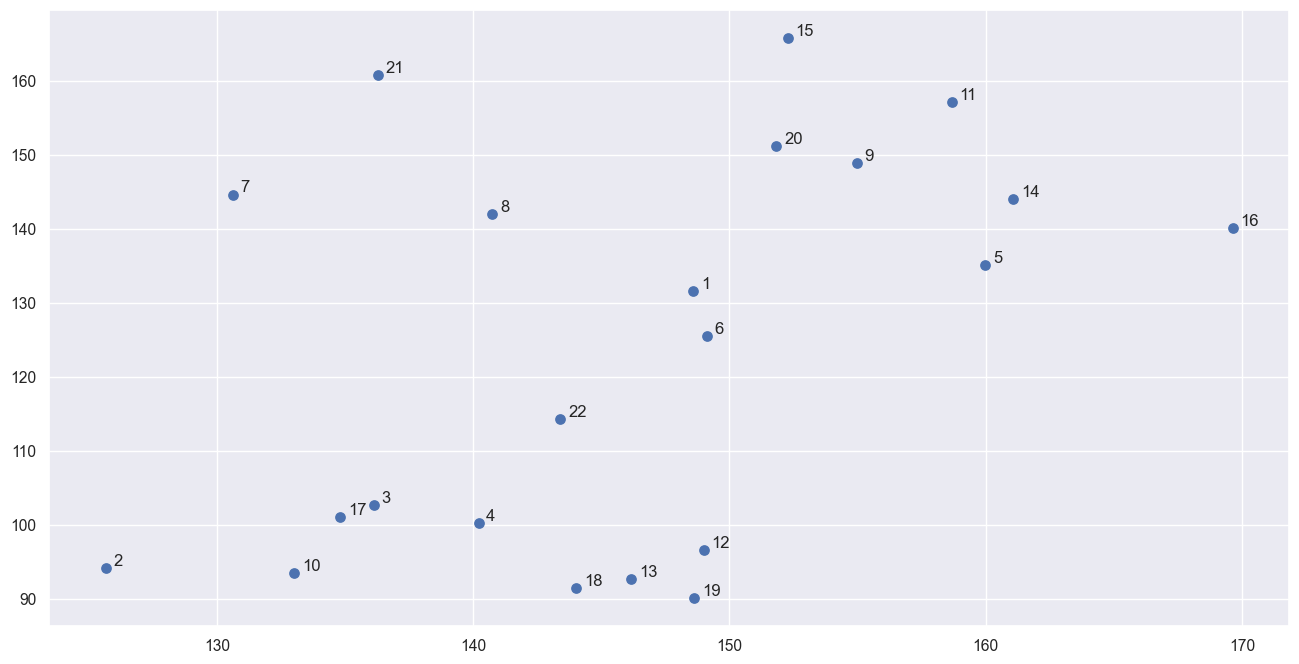

In [4]:
plt.scatter(cities_coord[:, 0], cities_coord[:, 1], s=plot_size*3);

for i in range(num_cities):
    plt.annotate(i+1, (cities_coord[i, 0]+0.3, cities_coord[i, 1]+0.3))

Calculate the distance between cities

In [5]:
from scipy.spatial import distance
dist_matrix = distance.cdist(cities_coord, cities_coord, 'euclidean')


In [6]:
from pulp import LpProblem,LpMinimize,LpVariable,LpBinary,lpSum,LpInteger

prob = LpProblem('TSP', LpMinimize)


In [7]:
N = [(f'N{(i+1):02}') for i in range(num_cities)]
c = {n_f:{n_t: round(dist_matrix[i][j],2) for j,n_t in enumerate(N)} for i,n_f in enumerate(N)}
x = LpVariable.dicts('x',(N,N), 0,1,LpBinary)
subset = LpVariable.dicts('subset',N,0,num_cities-1,LpInteger)

origen='N06'

$$ 
x[i][j]\leq 1
$$

$$
\sum_i^{Cities}\sum_j^{Cities} x_{ij} \leq 1 \text{ if } i != j \text{ else } x_{ij} = 0
$$

In [8]:
prob += lpSum([lpSum([x[i][j]*c[i][j] for j in N if i!=j]) 
                                      for i in N])

for i in N:
        movements_in=[]
        movements_out=[]
        for j in N:
                if i == j:
                        prob += x[i][j] == 0
                else:
                        movements_in.append(x[i][j])
                        movements_out.append(x[j][i])
                        if i!= origen and j!=origen:
                                prob += subset[i]-subset[j] <= num_cities*(1-x[i][j])-1
        prob += lpSum(movements_in) == 1
        prob += lpSum(movements_out) == 1


In [9]:
from pulp import LpStatus
status = prob.solve()

print(f'\nSTATUS\n{LpStatus[status]}\n')


STATUS
Optimal



Now we can plot our results.

C:\Users\rmaxr\AppData\Local\Temp\ipykernel_34588\2645611430.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(_cities_coord[:, 0],


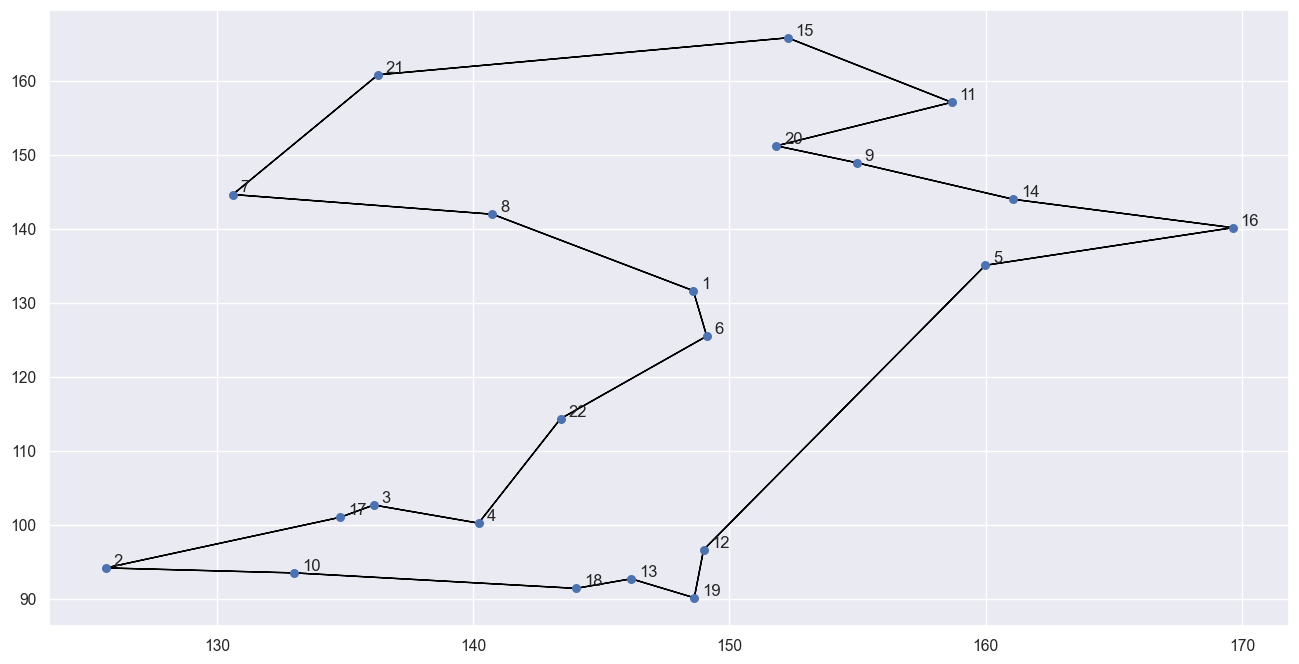

In [10]:
def plot_solution(_N, _x, _cities_coord):
    vect_orig = []
    vect_dest = []
    u = v = np.zeros((len(vect_orig),len(vect_orig)))

    for j,n_t in enumerate(_N):
        for i,n_f in enumerate(_N):
            if i!=j:
                if _x[n_f][n_t].varValue > 0:
                    vect_orig.append(_cities_coord[i])
                    vect_dest.append(_cities_coord[j])

    vect_orig = np.array(vect_orig)
    vect_dest = np.array(vect_dest)

    plt.scatter(_cities_coord[:, 0], 
                _cities_coord[:, 1], 
                s=plot_size*2, 
                cmap='viridis',
                zorder = 10000);

    for i in range(len(vect_orig)):
        plt.arrow(vect_orig[i][0],
                  vect_orig[i][1],
                  vect_dest[i][0]-vect_orig[i][0],
                  vect_dest[i][1]-vect_orig[i][1],
                  color='black')
    
    for i in range(num_cities):
        plt.annotate(i+1, (cities_coord[i, 0]+0.3, cities_coord[i, 1]+0.3))

plot_solution(N, x, cities_coord)